In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def pre_process(org_house_df):
    
    house_df = pd.DataFrame()
    
    org_house_df = org_house_df.fillna({'MSZoning' : 'RL'}) 
    house_df['MSZoning']= org_house_df['MSZoning'].map({'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}).astype(int)
    house_df['LandContour']= org_house_df['LandContour'].map({'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}).astype(int)
    house_df['Condition1']= org_house_df['Condition1'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNe': 7,
         'RRNn': 8}).astype(int)
    house_df['Condition2']= org_house_df['Condition2'].map({'Artery': 0,
         'Feedr': 1,
         'Norm': 2,
         'PosA': 3,
         'PosN': 4,
         'RRAe': 5,
         'RRAn': 6,
         'RRNn': 7}).astype(int)
    house_df['Neighborhood']= org_house_df['Neighborhood'].map({'Blmngtn': 0,
         'Blueste': 1,
         'BrDale': 2,
         'BrkSide': 3,
         'ClearCr': 4,
         'CollgCr': 5,
         'Crawfor': 6,
         'Edwards': 7,
         'Gilbert': 8,
         'IDOTRR': 9,
         'MeadowV': 10,
         'Mitchel': 11,
         'NAmes': 12,
         'NPkVill': 13,
         'NWAmes': 14,
         'NoRidge': 15,
         'NridgHt': 16,
         'OldTown': 17,
         'SWISU': 18,
         'Sawyer': 19,
         'SawyerW': 20,
         'Somerst': 21,
         'StoneBr': 22,
         'Timber': 23,
         'Veenker': 24}).astype(int)
    house_df['BldgType']= org_house_df['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}).astype(int)
    house_df['HeatingQC']= org_house_df['HeatingQC'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    house_df['BedroomAbvGr']= org_house_df['BedroomAbvGr']
    
    org_house_df = org_house_df.fillna({'KitchenQual' : 'TA'}) 
    house_df['KitchenQual']= org_house_df['KitchenQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}).astype(int)
    
    house_df['TotRmsAbvGrd']= org_house_df['TotRmsAbvGrd']
    house_df['Fireplaces']= org_house_df['Fireplaces']
    
    org_house_df = org_house_df.fillna({'FireplaceQu' : 'Gd'}) 
    house_df['FireplaceQu']=org_house_df['FireplaceQu'].map({ 'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageType' : 'Attchd'}) 
    house_df['GarageType']=org_house_df['GarageType'].map({'2Types': 0,
         'Attchd': 1,
         'Basment': 2,
         'BuiltIn': 3,
         'CarPort': 4,
         'Detchd': 5}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageQual' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    org_house_df = org_house_df.fillna({'GarageCond' : 'TA'}) 
    house_df['GarageQual']=org_house_df['GarageQual'].map({'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4}).astype(int)
    
    house_df['OverallCond']=org_house_df['OverallCond']
    house_df['OverallQual']=org_house_df['OverallQual']
    
    return house_df
 

In [3]:
org_house_df = pd.read_csv('train.csv')

In [4]:
house_df = pre_process(org_house_df)

In [5]:
t = org_house_df['SalePrice'].values
x = house_df.values

In [6]:
t = t.astype('f')
x = x.astype('f')

In [7]:
t = t.reshape(len(t), 1)

In [8]:
dataset = list(zip(x, t))

In [9]:
import chainer
import chainer.functions as F
import chainer.links as L
import chainer
import cupy

from chainer import training
from chainer.training import extensions
from chainer.optimizer import WeightDecay

/usr/local/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
n_train = int(len(dataset)*0.7)

In [11]:
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)

In [12]:
class NN(chainer.Chain):
    def __init__(self, n_mid_units1=10, n_mid_units2=5, n_out=1):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units1)
            self.fc2 = L.Linear(None, n_mid_units2)
            self.fc3 = L.Linear(None, n_out)
            
            self.bn = L.BatchNormalization(16)
        
    def __call__(self, x):
        h = self.bn(x)
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)

        return h

In [13]:
np.random.seed(0)
nn = NN()
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
batch_size = 10

In [14]:
train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

In [15]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

In [16]:
epoch = 100

In [17]:
trainer = training.Trainer(updater, (epoch, "epoch"), out="result/house_price")

trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, "epoch")))
trainer.extend(extensions.PrintReport(["epoch", "main/loss", "validation/main/loss"]))

In [18]:
trainer.run()

epoch       main/loss   validation/main/loss
1           4.04579e+10  3.63465e+10           
2           3.99455e+10  3.63442e+10           
3           4.00382e+10  3.6331e+10            
4           4.04581e+10  3.62788e+10           
5           4.00579e+10  3.6122e+10            
6           3.95642e+10  3.5792e+10            
7           3.94334e+10  3.51945e+10           
8           3.85884e+10  3.43371e+10           
9           3.71504e+10  3.30113e+10           
10          3.57128e+10  3.13669e+10           
11          3.34964e+10  2.89222e+10           
12          3.11072e+10  2.64635e+10           
13          2.80032e+10  2.36316e+10           
14          2.46764e+10  2.01691e+10           
15          2.1256e+10  1.69721e+10           
16          1.77431e+10  1.40617e+10           
17          1.44061e+10  1.04848e+10           
18          1.13668e+10  8.79108e+09           
19          8.81724e+09  6.3983e+09            
20          6.75323e+09  4.83401e+09        

In [19]:
import json

In [20]:
with open("result/house_price/log") as f:
    logs = json.load(f)

In [21]:
results = pd.DataFrame(logs)

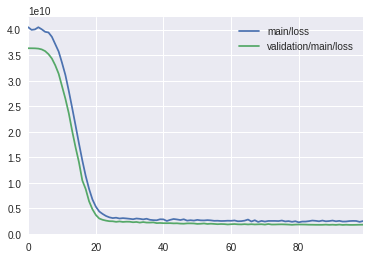

In [22]:
results[["main/loss", "validation/main/loss"]].plot()

In [146]:
chainer.serializers.save_npz("models/house_price_1.npz", model)

In [147]:
test_house_df = pd.read_csv('test.csv')

In [148]:
predict_df = pre_process(test_house_df)

In [149]:
x = predict_df.values

In [150]:
x = x.astype('f')

In [151]:
sale_prices = []

In [152]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    for i, x_ in enumerate(x):
        x_new = x_
        x_new = x_new[np.newaxis]
        y = model.predictor(x_new)
        sale_prices.append(y.data)

In [153]:
output_df = pd.DataFrame()

In [154]:
sale_prices = np.reshape(sale_prices, 1459)

In [155]:
output_df['Id'] = predict_house_df['Id']
output_df['SalePrice'] = np.array(sale_prices)

In [156]:
output_df.head()

,Id,SalePrice
0,1461,120196.507812
1,1462,177879.109375
2,1463,154344.031250
3,1464,220068.046875
4,1465,226680.796875


In [158]:
output_df.to_csv('predict_20190104.csv')